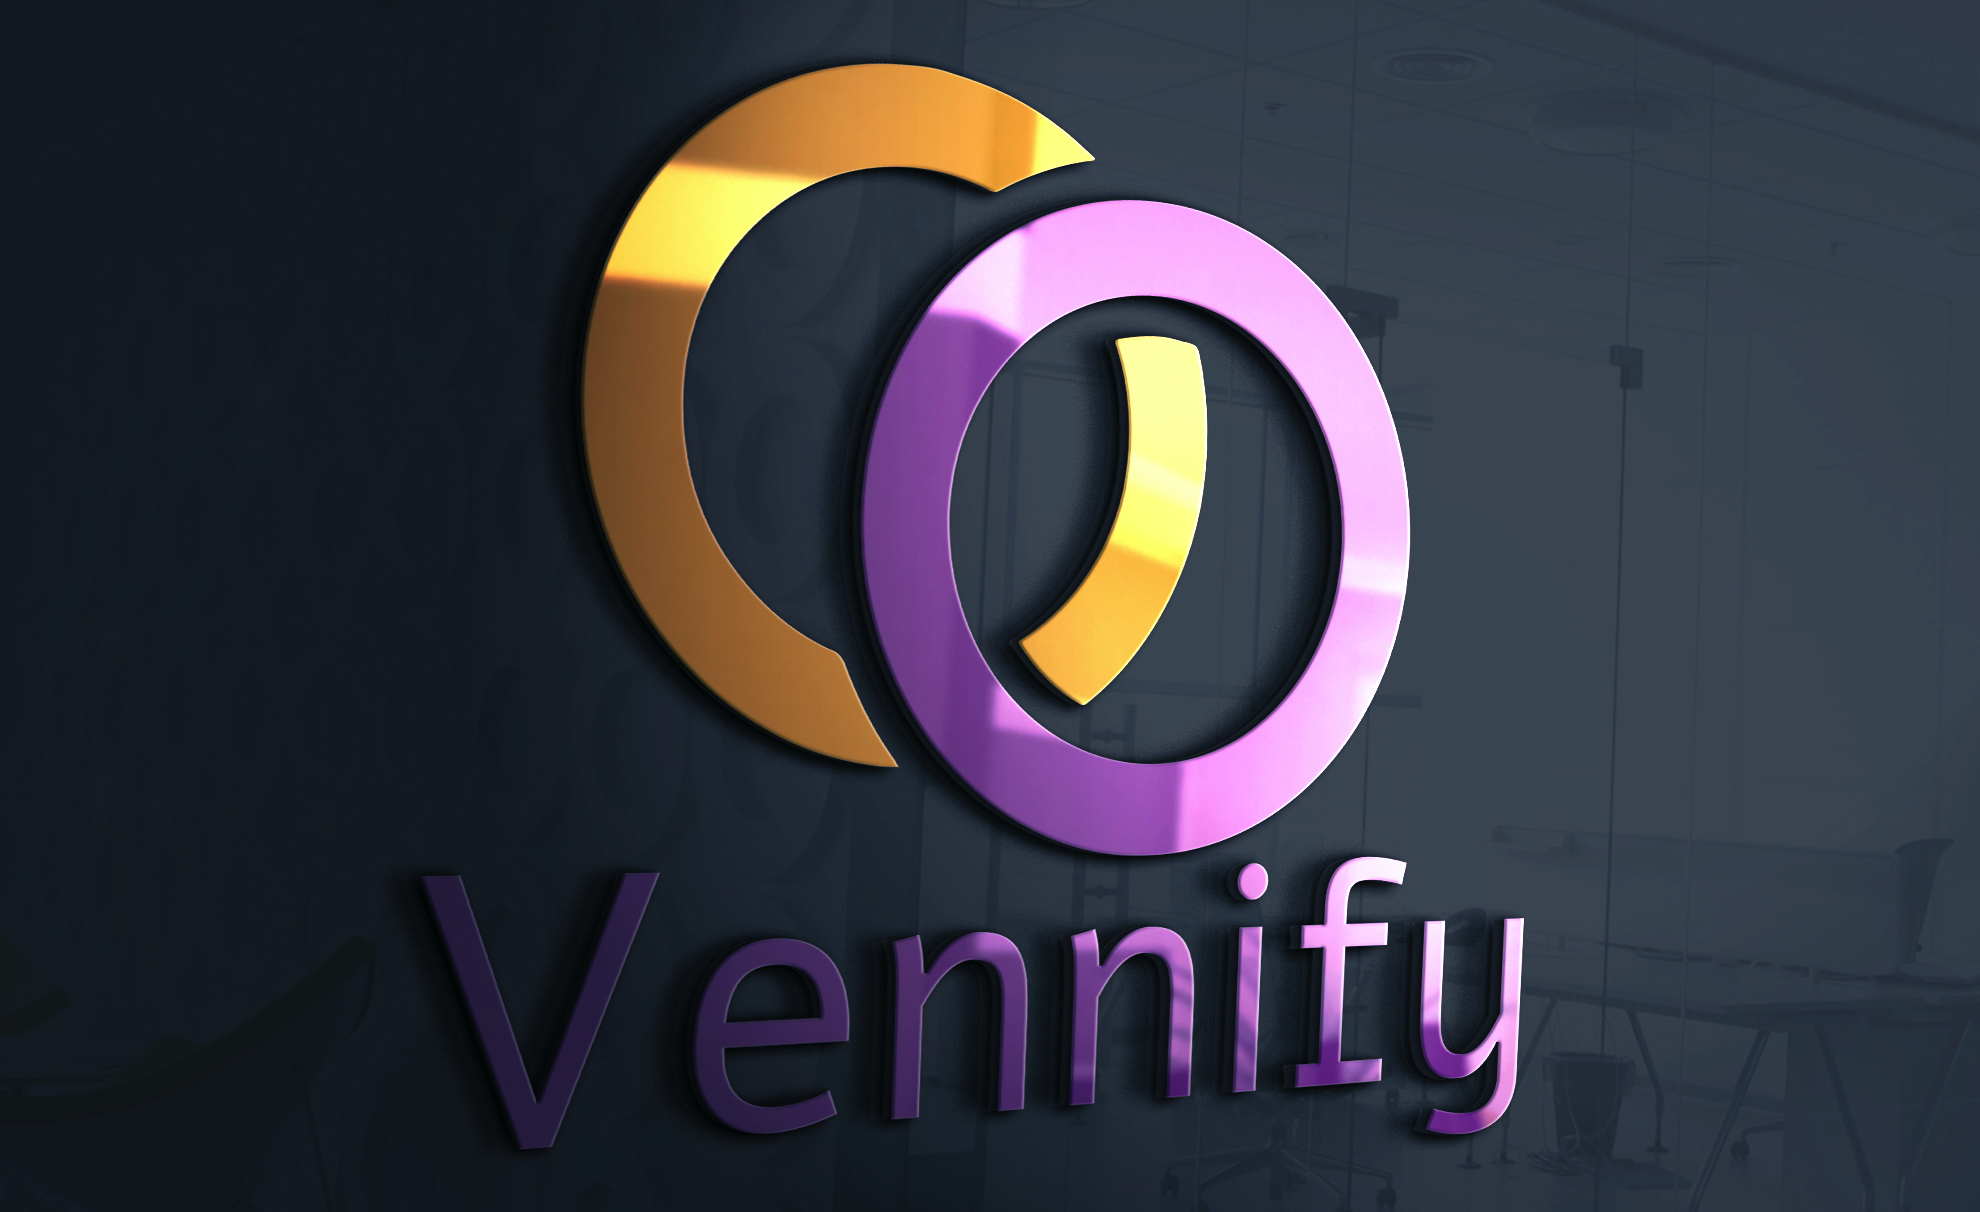

### Install Happy Transformer
https://github.com/EricFillion/happy-transformer 

In [1]:
pip install happytransformer

     |████████████████████████████████| 45 kB 4.5 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 3.5 MB 65.1 MB/s 
     |████████████████████████████████| 312 kB 58.9 MB/s 
     |████████████████████████████████| 243 kB 65.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 133 kB 56.5 MB/s 
     |████████████████████████████████| 596 kB 18.0 MB/s 
     |████████████████████████████████| 6.8 MB 58.9 MB/s 
     |████████████████████████████████| 895 kB 72.7 MB/s 
     |████████████████████████████████| 271 kB 59.7 MB/s 
     |████████████████████████████████| 94 kB 4.7 MB/s 
     |████████████████████████████████| 144 kB 75.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


### Import HappyGeneration

In [2]:
from happytransformer import HappyGeneration

### Create a HappyGeneration Object 

In [3]:
happy_gen = HappyGeneration("GPT-NEO", 'EleutherAI/gpt-neo-125M')

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/560 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

01/31/2022 00:33:41 - INFO - happytransformer.happy_transformer -   Using model: cuda


### Hugging Face's datasets library

In [4]:
from datasets import load_dataset

In [5]:
train_dataset = load_dataset('billsum', split="train[:5000]")
eval_dataset = load_dataset('billsum', split="test[:1000]")

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/832 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.3M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset billsum downloaded and prepared to /root/.cache/huggingface/datasets/billsum/default/3.0.0/d1e95173aed3acb71327864be74ead49b578522e4c7206048b2f2e5351b57959. Subsequent calls will reuse this data.


##  Bill Generator

https://huggingface.co

https://huggingface.co/datasets/billsum

In [6]:
def generate_text(path, dataset):
  with open(path, "w") as text_file:
    for case in dataset:
      text_file.write(case['summary'] + "\n")

In [7]:
train_path = "train.txt"
eval_path = 'eval.txt'

In [8]:
generate_text(train_path, train_dataset)

In [9]:
generate_text(eval_path, eval_dataset)

In [10]:
result_before = happy_gen.eval(eval_path)

01/31/2022 00:34:18 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-7d478539f7e62496/0.0.0/d86c40dad297bdddf277b406c6a59f0250b5318c400bf23d420a31aff88c84c4. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

01/31/2022 00:34:20 - INFO - happytransformer.happy_transformer -   Evaluating...
***** Running Evaluation *****
  Num examples = 105
  Batch size = 1


In [11]:
print(result_before.loss)

2.925240993499756


### Training

https://happytransformer.com/text-generation/finetuning/

In [12]:
from happytransformer import GENTrainArgs

In [13]:
train_args = GENTrainArgs(learning_rate=5e-5, num_train_epochs=3)

In [14]:
happy_gen.train(train_path, args=train_args)

01/31/2022 00:35:51 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-1d15625faaa873a0/0.0.0/d86c40dad297bdddf277b406c6a59f0250b5318c400bf23d420a31aff88c84c4. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/20 [00:00<?, ?ba/s]

01/31/2022 00:35:59 - INFO - happytransformer.happy_transformer -   Training...
PyTorch: setting up devices
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 546
  Num Epochs = 3
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 1638


Step,Training Loss
500,2.611400
1000,2.316700
1500,2.182700


Saving model checkpoint to /tmp/tmp4ov_ows4/checkpoint-500
Configuration saved in /tmp/tmp4ov_ows4/checkpoint-500/config.json
Model weights saved in /tmp/tmp4ov_ows4/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /tmp/tmp4ov_ows4/checkpoint-500/tokenizer_config.json
Special tokens file saved in /tmp/tmp4ov_ows4/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /tmp/tmp4ov_ows4/checkpoint-1000
Configuration saved in /tmp/tmp4ov_ows4/checkpoint-1000/config.json
Model weights saved in /tmp/tmp4ov_ows4/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /tmp/tmp4ov_ows4/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /tmp/tmp4ov_ows4/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /tmp/tmp4ov_ows4/checkpoint-1500
Configuration saved in /tmp/tmp4ov_ows4/checkpoint-1500/config.json
Model weights saved in /tmp/tmp4ov_ows4/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in /tmp/tmp4ov_ows4/checkpo

In [15]:
result_after = happy_gen.eval(eval_path)

01/31/2022 01:00:22 - INFO - happytransformer.happy_transformer -   Preprocessing dataset...


  0%|          | 0/1 [00:00<?, ?it/s]

01/31/2022 01:00:23 - INFO - happytransformer.happy_transformer -   Evaluating...
PyTorch: setting up devices
***** Running Evaluation *****
  Num examples = 105
  Batch size = 1


In [16]:
print(result_after.loss)

2.5439915657043457


### Examples

In [17]:
happy_gen_nft = HappyGeneration('GPT-NEO', 'EleutherAI/gpt-neo-125M')

loading configuration file https://huggingface.co/EleutherAI/gpt-neo-125M/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/29380fef22a43cbfb3d3a6c8e2f4fd951459584d87c34e4621b30580a54aca84.f0f7ebddfc6e15a23ac33e7fa95cd8cca05edf87cc74f9e3be7905f538a59762
Model config GPTNeoConfig {
  "_name_or_path": "EleutherAI/gpt-neo-125M",
  "activation_function": "gelu_new",
  "architectures": [
    "GPTNeoForCausalLM"
  ],
  "attention_dropout": 0,
  "attention_layers": [
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local"
  ],
  "attention_types": [
    [
      [
        "global",
        "local"
      ],
      6
    ]
  ],
  "bos_token_id": 50256,
  "embed_dropout": 0,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": null,
  "layer_norm_epsilon": 1e-05,
  "max_position_embedding

In [31]:
prompt = 'Authorizes'

In [32]:
result_ft = happy_gen.generate_text(prompt)
result_nft = happy_gen_nft.generate_text(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [33]:
result_ft.text


' the Secretary of the Interior to establish a program to provide grants to eligible entities to assist in the development of a comprehensive management plan for the National Forest System. Authorizes appropriations. Authorizes appropriations. Authorizes appropriations. Authorizes appropriations'

In [34]:
result_nft.text

'\n\nThe following is a list of the most recent releases from the EMEA community.\n\nRelease Notes\n\nRelease Notes\n\nRelease Notes\n\nRelease Notes\n\nRelease Notes\n\nRelease Notes\n\nRelease Notes\n\nRelease'